In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [10]:
# Проверяем формат столбцов
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [12]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

Сгруппируйте данные по дате, посчитайте количество продаж

In [18]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [20]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

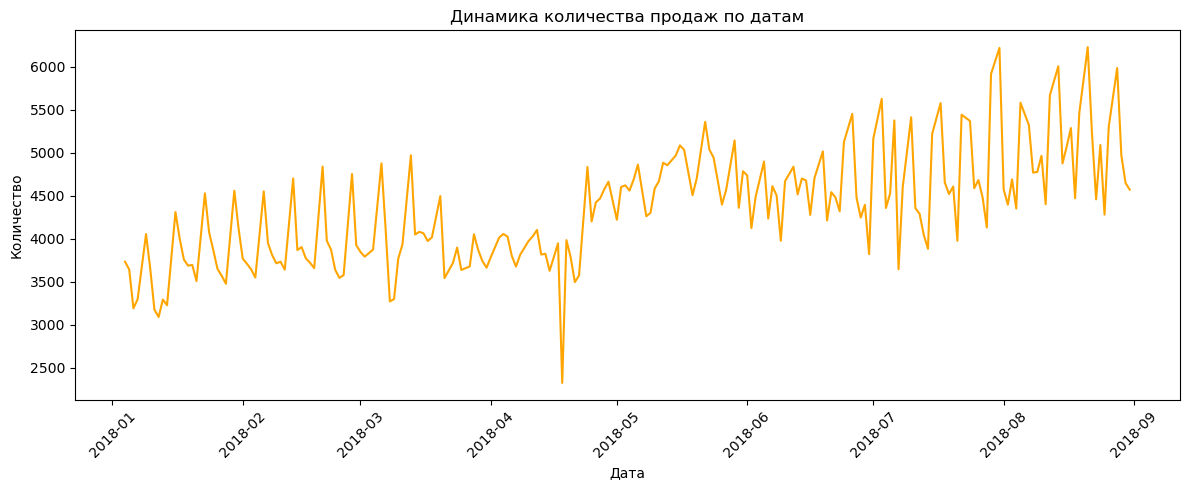

In [22]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=grouped_df, x='Дата', y='Количество', color='orange')
plt.title('Динамика количества продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

Общий тренд: наблюдается плавный рост количества продаж на протяжении всего периода.
В январе продажи колеблются в районе 3000–4000 единиц.
К августу уровень достигает 6000+ — рост почти в два раза.
Это может указывать на успешную сезонную стратегию или расширение бизнеса.
Присутствуют регулярные резкие колебания, похожие на недельную цикличность.
Например, падения каждые 5–7 дней могут быть выходными или низкими днями по продажам.
Вероятно, спрос максимален в одни и те же дни недели.
В мае и июле заметны особенно сильные пики, возможно, из-за акций, праздников или внешних факторов (например, погода или маркетинг).
В начале апреля виден резкий провал — значение падает почти до 2500, что существенно ниже окружающих значений.
Возможные причины: технический сбой, сбой загрузки данных, праздники, сбои логистики или отсутствие товара.
Также в августе зафиксирован резкий пик выше 6200 — это максимум на всём графике. Он может свидетельствовать о пиковом спросе (например, конец сезона, массовые закупки, спецпредложения).
Весной продажи становятся более стабильными, пики становятся более "густыми".
Лето (июнь–август) характеризуется высокой волатильностью, но средний уровень выше, чем в начале года.
Это может говорить о росте активности клиентов в летний сезон или успешной маркетинговой кампании.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [24]:
max_outlier = df[df['Количество'] == df['Количество'].max()]
print(max_outlier)

             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [26]:
df['Месяц'] = df['Дата'].dt.month
df['День недели'] = df['Дата'].dt.dayofweek  # 2 = среда

summer_df = df[(df['Месяц'].isin([6, 7, 8])) & (df['День недели'] == 2)]
top_product = summer_df.groupby(['Склад', 'Номенклатура'])['Количество'].sum().reset_index()
top_by_warehouse = top_product.sort_values(['Склад', 'Количество'], ascending=[True, False])
print(top_by_warehouse.groupby('Склад').head(1))



    Склад Номенклатура  Количество
1       1    product_1        2981
24      2    product_1        2887
46      3    product_1        2267
69      4    product_1        2385
92      5    product_1        1956


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [34]:
import pandas as pd

# Загружаем файл, пропуская первые 6 строк
weather_df = pd.read_csv('weather.csv', skiprows=6, delimiter=';', encoding='utf-8')

# Посмотрим, какие колонки есть
print(weather_df.columns)
print(weather_df.head())

Index(['Местное время в Астане', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10',
       'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch',
       'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')
                  Местное время в Астане      T     Po    P    Pa  \
30.09.2018 23:00                     9.9  732.4  763.8 -0.7  57.0   
30.09.2018 20:00                    11.9  733.1  764.2 -0.5  56.0   
30.09.2018 17:00                    19.1  733.6  764.0 -1.4  24.0   
30.09.2018 14:00                    19.7  735.0  765.4 -1.9  26.0   
30.09.2018 11:00                    16.5  736.9  767.7 -0.7  43.0   

                                                U  DD  Ff  ff10           ff3  \
30.09.2018 23:00              Ветер, дующий с юга   1 NaN   NaN       20–30%.   
30.09.2018 20:00              Ветер, дующий с юга   1 NaN   NaN  Облаков нет.   
30.09.2018 17:00              Ветер, дующий с юга   1 NaN   NaN  Облаков нет.   
30.09.2018 14:00        

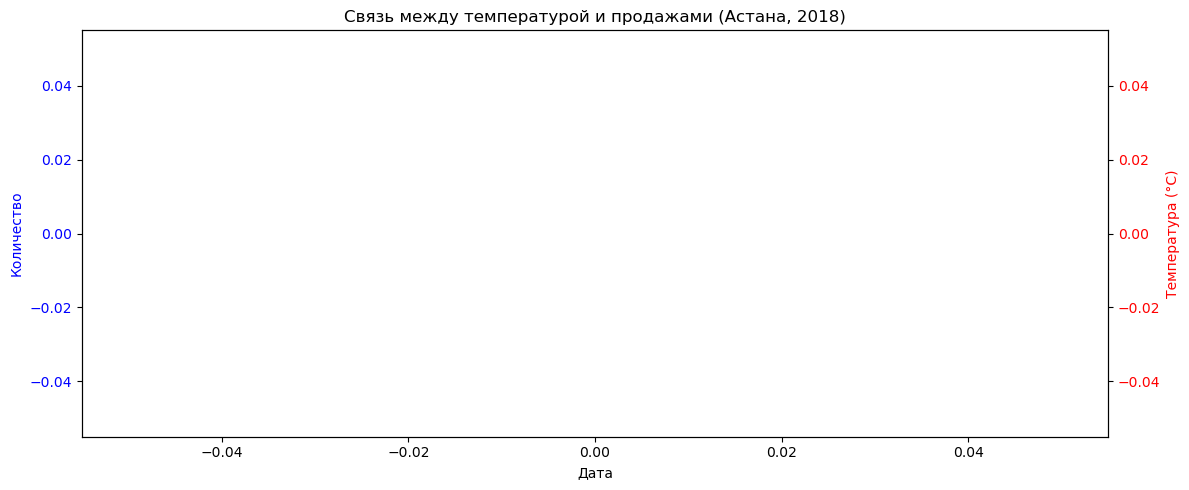

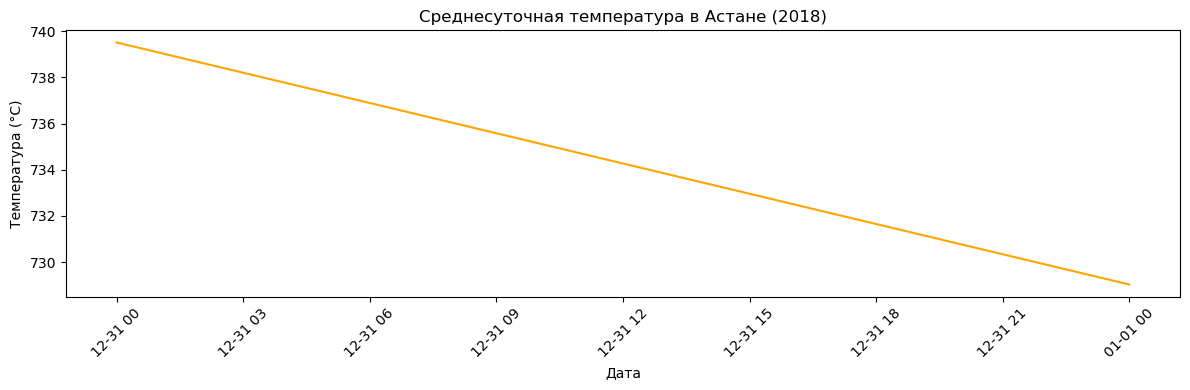

In [36]:
# Преобразуем "Местное время в Астане" в формат datetime
weather_df['Дата'] = pd.to_datetime(weather_df['Местное время в Астане'], errors='coerce')

# Оставим только дату (без времени)
weather_df['Дата'] = weather_df['Дата'].dt.date

# Преобразуем температуру в числовой формат
weather_df['T'] = pd.to_numeric(weather_df['T'], errors='coerce')

# Удалим пропущенные значения
weather_df = weather_df.dropna(subset=['Дата', 'T'])
daily_temp = weather_df.groupby('Дата')['T'].mean().reset_index()
# Убедимся, что grouped_df['Дата'] приведён к .dt.date
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата']).dt.date

# Объединяем таблицы
merged_df = pd.merge(grouped_df, daily_temp, on='Дата', how='inner')
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество', color='blue')
ax1.plot(merged_df['Дата'], merged_df['Количество'], color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Температура (°C)', color='red')
ax2.plot(merged_df['Дата'], merged_df['T'], color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Связь между температурой и продажами (Астана, 2018)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#График 2: Только температура

plt.figure(figsize=(12, 4))
plt.plot(daily_temp['Дата'], daily_temp['T'], color='orange')
plt.title('Среднесуточная температура в Астане (2018)')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()